In [ ]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
from urllib.request import urlopen
from skimage.color import rgb2gray
from numpy.linalg import norm

The following function get_images() returns the dataset of 10 images as a list of images.

In [ ]:
# do not modify the following code
def get_images():
  num_im = 10
  ims = []
  for i in range(num_im):
    url = 'https://raw.githubusercontent.com/guptashvm/Data/master/data/%02d.png'%(i)
    with urlopen(url) as file:
      im = mpimg.imread(file)
      ims.append(im)
  return ims


In [ ]:
images = get_images()
#tranforming collor images to gray scale
for i, image in enumerate(images):
  original = image
  grayscale = rgb2gray(original)
  images[i] = grayscale

print(images[5].shape)

(224, 224)


In this problem we will work on image compression using SVD. The basic concept is to represent an image with size $m \times n$ as a two-dimentional $m \times n$ matrix. SVD is then applied to this matrix to obtain the U, S, and V matrices. S is a diagonal $m \times n$ matrix whose number of non-zero elements on the diagonal determines the rank of the original matrix. Then we can use a smaller number of rank to approximate the original image. For example, you can keep the biggest $k$ singular values and set all the others to 0. 
    
We provide 10 images in the dataset. Try $k=1, 2, \dots, 30$ to reconstruct the original images and plot the error averaged on all the images. You can measure the reconstruction error by mean L1 error. It is defined as:

$$error_{l_1} = \frac{1}{mn}\sum_{i=1}^{m}\sum_{j=1}^{n}||reconstruction(i,j)-original(i,j)||_1$$

In [ ]:
#Define the SVD comoression function
def compressing_svd(ims, k):
  U,S,V = svd(ims,full_matrices=False)
  reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(S[:k]),V[:k,:]))
  return reconst_matrix,S

def make2dList(rows, cols):
    return [ ([0] * cols) for row in range(rows) ]

rows = 10
cols = 30
m,n= images[0].shape

recon = make2dList(rows,cols)
error = make2dList(rows,cols)
l1 = np.zeros((rows,cols))
for i, image in enumerate(images,0):
  for k in range(0,30):
    original_shape = image.shape
    reconst_img,s=compressing_svd(image,k)
    recon[i][k]=reconst_img
    error[i][k] = recon[i][k]-images[i]
    #l1[i,k] = (1/(m*n))*norm(error[i][k])
    l1[i,k] = lg.norm((error[i][k]),ord=1)


NameError: ignored

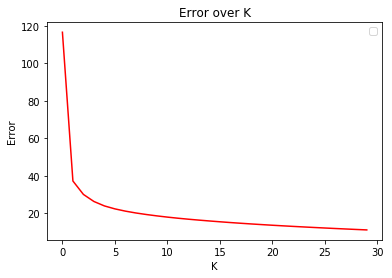

In [ ]:
AveError = np.zeros(30)
for k in range(0,30):
  AveError[k] = l1[:,k].mean()

#Plotting the Ave errors for 1 & 2
plt.title('Error over K')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend("Error")
plt.plot(range(0,30), AveError, 'r')
plt.show()

Also visualize some reconstructed images and compare them to the original **ones**. Display the first image in the dataset along with its rank $10$ approximation. Also, display the second image in the dataset along with its rank $15$ approximation.

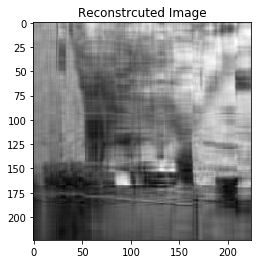

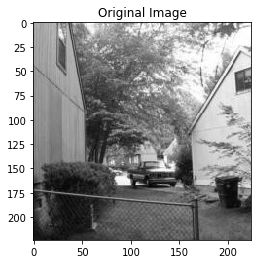

In [ ]:
def ShowImage(img,k):
  recon_img,s = compressing_svd(img,k)
  plt.imshow(recon_img,cmap ="gray")

fig,axs = plt.subplots(1,1)
plt.title("Reconstrcuted Image")
ShowImage(images[0],10)
fig,axs = plt.subplots(1,1)
plt.title("Original Image")
plt.imshow(images[0],cmap="gray")



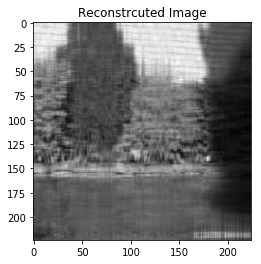

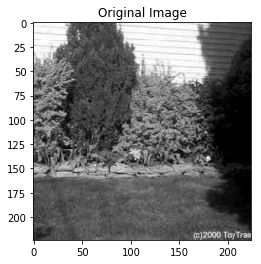

In [ ]:
fig,axs = plt.subplots(1,1)
plt.title("Reconstrcuted Image")
ShowImage(images[1],15)
fig,axs = plt.subplots(1,1)
plt.title("Original Image")
plt.imshow(images[1],cmap="gray")